<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Material Complementario - Aplicaciones Recientes </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Arquitecturas recientes de redes convolucionales.
* ImageNet *Challenge*. 
* Problema VQA
* YOLO

<hr style="height:2px;border:none"/>

*Nota: Esta actividad es para que puedan familiarizarse con aplicaciones recientes en el contexto de redes neuronales artificiales*

<a id="tercero"></a>
## Aplicaciones Recientes

El dataset de Imagenet [[1]](#refs) y su *Challenge* a podido ser un evaluador de distintos algoritmos en deteección de objetos e imágenes a gran escala, gracias a sus millones de imágenes catalogadas sobre mil posibles clases en un modelo de *crowdsourcing* (las imágenes son etiquetadas por personas en la nube). El primer modelo con arquitectura de redes neuronales profundas convolucionales que logró una mejora considerable respecto al resto de algoritmos/modelos en este *benchmark* de Imagenet fue la red de Alex *et al.* [[2]](#refs) en el año 2012, utilizando funciones de activaciones *ReLU*, en donde anteriormente se utilizaba *tanh* o *sigmoid* y la técnica de Dropout para evitar *overfitting*. La arquitectura utilizada tiene 5 bloques convolucionales seguida de 3 capas densas como se muestra a continuación:

<img src="http://cv-tricks.com/wp-content/uploads/2017/03/xalexnet_small-1.png.pagespeed.ic.EZPeJF1qqb.webp" title="ALEXNET" width="80%"/>

Luego de *AlexNet* el grupo VGG (Oxford) en el año 2014 presenta una arquitectura [[3]](#refs) que reemplaza los grandes tamaños de kernels por una mayor profundidad con kernels de tamaño 3x3. Además de ésto varias otras arquitecturas se han propuestos y medida su calidad a través de Imagenet, en *Keras* podemos acceder a varias de éstas arquitecturas, algunas de éstas y sus detalles se encuentran a continuación:

|Model|Size|Top-1 Accuracy|Top-5 Accuracy|Parameters|Depth|
|---|---|---|---|---|---|
|VGG16|	528 MB|	0.715|	0.901|	138,357,544|	23|
|VGG19|	549 MB|	0.727|	0.910|	143,667,240|	26|
|ResNet50|	99 MB|	0.759	|0.929	|25,636,712	|168|
|InceptionV3|	92 MB|	0.788|	0.944|	23,851,784	|159|
|MobileNet|	17 MB|	0.665|	0.871|	4,253,864|	88|
|DenseNet121|	33 MB|	0.745|	0.918|	8,062,504|	121|


Podemos ver que algunas arquitecturas a pesar de tener más capas el tamaño en base a la cantidad de parámetros a almacenar es menor. La mayor cantidad de parámetros de éstas arquitecturas están en sus bloques densos o *fully connected*

> ¿Porqué VGG16 tiene el sufijo 16 si tiene profundidad 23, o bien ResNet tiene el sufijo 50 si es que tiene 168 capas?  
>> Esto es porque el sufijo hace referencia a los **bloques** convolucionales, es decir, una capa de convolucion en conjunto con algún otra tal como *pooling*, función de activación *custom*, *batch normalization* u otro. 



### Inception [[4]](#refs)
Un grupo de Google en el año 2014 desarrolló la red de *InceptionV1*, la cual resulta un poco mas livana (*MB*) que las de *VGG* además de aumentar el desempeño en las métricas de *ImageNet*, llegando a ser la ganadora del *challenge* ese año. Sin embargo, en *Keras* podemos acceder a su tercera versión *V3* presentada el 2016. Esta arquitectura tiene la capacidad de tener múltiples filtros de distinto tamaño operando de manera simultánea sobre el *input* realizando un *stack* de las salidas, pudiendo detectar patrones a diferente escala, esto es gracias a los llamados *módulos Inception*.

<img src="https://i.stack.imgur.com/zTinD.png" title="inceptionmodule" width="50%"/>


Además, respecto a las anteriores arquitecturas reduce la cantidad de parámetros eliminando capas densas mediante un promedio por cada filtro de activación.

In [1]:
from keras.applications import inception_v3
from keras.layers import Input
input_t = Input(shape =(299, 299, 3)) #default input dim
model_inception = inception_v3.InceptionV3(include_top=True,weights=None,input_tensor=input_t)
model_inception.summary()

/home/fmena/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

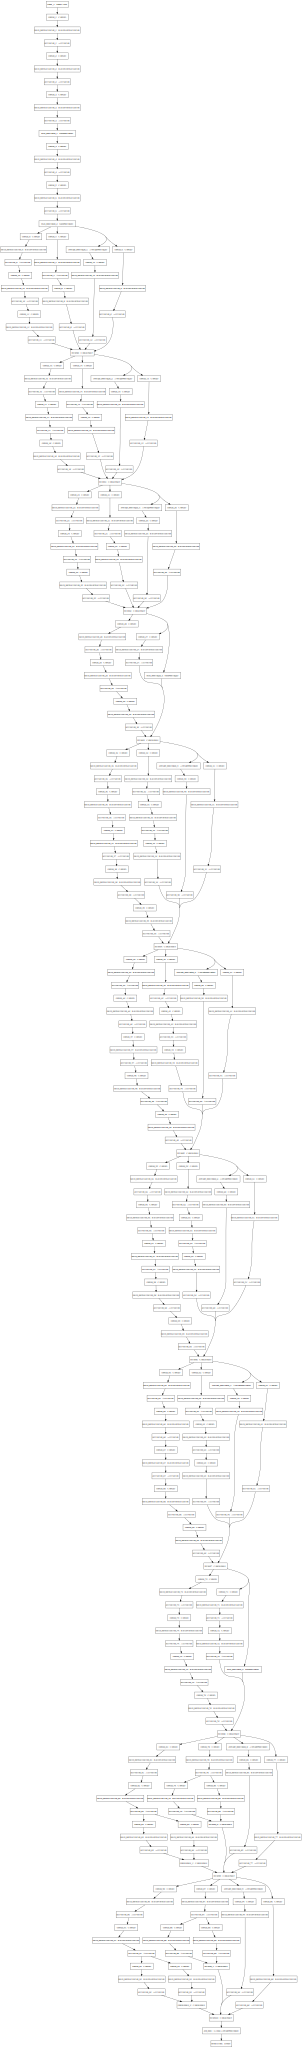

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_inception).create(prog='dot', format='svg'))

Se puede ver que la red en sí no tiene capas densas, sino que la última (necesaria) para la clasificación. Además que fue entrenado con imágenes RGB redimensionadas a 299x299 pixeles.

In [14]:
#preprocessing
import numpy as np
image_array = np.random.random((299,299,3))*256
print("Rango imagen original de %d a %d"%(np.min(image_array),np.max(image_array)))
X_inception = inception_v3.preprocess_input(image_array)
print("Rango imagen preprocesado de %f a %f"%(np.min(X_inception),np.max(X_inception)))

Rango imagen original de 0 a 255
Rango imagen preprocesado de -0.999993 a 1.007828


In [6]:
import keras
from keras.applications.vgg16 import preprocess_input
preprocess_input

<function keras_applications.imagenet_utils.preprocess_input>

Se puede ver que el preprocesamiento que hace la red de **Inception** a las imágenes con pixeles entre 0 a 255 es la de escalar cada uno de éstos en un rango entre -1 y 1.

### ResNet [[5]](#refs)
Un grupo de *Microsoft Research* en el año 2016 presenta ResNet. Hasta ahora la intuición dice que el aumentar la profundidad de la red debería implicar una mejora en el desempeño, si es que se mantiene cuidado del *overfitting*, el problema de ésto como ya se ha discutido en clases es el *vanish gradient* o *exploited gradient*. Una solución a ésto son las redes residuales, las cuales tienen conexiones o atajos hacia adelante, con activación lineal, así al momento de la actualización de los pesos el gradiente fluye a través de estas conexiones hacias las primeras las capas, evitando en parte los efectos de mayor profundidad en la red.

<img src="https://cdn-images-1.medium.com/max/1200/1*ByrVJspW-TefwlH7OLxNkg.png" title="resnet" width="30%"/>

Como se muestra en la imagen la conexión hacia adelante se suma a los valores de esa capa.

In [7]:
from keras.applications import resnet50
input_t = Input(shape =(224, 224, 3)) #default input dim
model_resnet = resnet50.ResNet50(include_top=True, weights=None,input_tensor=input_t)
model_resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

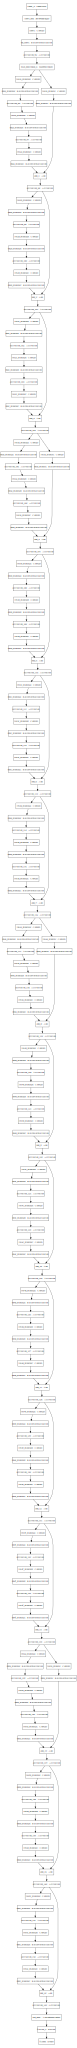

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_resnet).create(prog='dot', format='svg'))

Se muestra de manera visual los saltos en las conexiones. Además la red fue entrenada con las imágenes RGB orginales de *ImageNet* de 224x224.

In [13]:
#preprocessing
import numpy as np
image_array = np.random.random((299,299,3))*256
print("Rango imagen original de %d a %d"%(np.min(image_array),np.max(image_array)))
X_inception = resnet50.preprocess_input(image_array)
print("Rango imagen preprocesado de %f a %f"%(np.min(X_inception),np.max(X_inception)))

Rango imagen original de 0 a 255
Rango imagen preprocesado de -123.678172 a 152.057257


Se puede ver que el preprocesamiento que hace la red de **ResNet** a las imágenes con pixeles entre 0 a 255 es la de restar por el pixel promedio 152 aproximadamente $x-\hat{x}$.


> d) Utilice algunas de las dos arquitecturas mencionadas y muestre que es posible *reutilizar* las tandas convolucionales para algún otro problema con imágenes de diferentes dimensiones ¿Cuál es el beneficio de las redes convolucionales al problema de adaptarse a imágenes de distintos tamaños? ¿Si utiliza imágenes pequeña como en CIFAR de tamaño $32\times 32$ qué sucede? Comente

In [20]:
input_t = Input(shape =(32, 32, 3)) #any input size image you want
inception_v3.InceptionV3(include_top=False, weights=None,input_tensor=input_t)

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_215/convolution' (op: 'Conv2D') with input shapes: [?,1,1,288], [3,3,288,384].

Si uno utiliza imágenes muy pequeñas como es el caso de CIFAR (32x32) al cargar la red tira un error debido a que como éstas redes son tan profundas cuando se realiza *pooling* o una convolución con *stride* deja tan pequeña la imágen (de tamaño 1x1) que luego de ésto no es posible achicarlas más.

La arquitecutra **DenseNet** [[6]](#refs), del año 2017, es una de las que tiene mayor profundidad pero tiene la menor cantidad de parámetros, debido a que los tamaño de kernel son menor y utiliza saltos en las conexiones pero no sumando cono ResNet, sino que realizando un *stack* de los arreglos, siendo la ganadora de la competencia ese año.

In [16]:
from keras.applications import densenet
input_t = Input(shape =(224, 224, 3)) #default input dim
model_densenet = densenet.DenseNet121(include_top=True, weights=None,input_tensor=input_t)
model_densenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

### VQA [[7]](#refs)
El problema de *Visual Question Answering*, presentado en 2015, combina dos dominios de datos, el de lenguaje natural y el visual, con la tarea de responder una pregunta en base al contexto que entrega una imágen, como se muestra a continuación.

<img src="https://camo.githubusercontent.com/c28b203ae5ff8848a262627e107dabaee4455bb2/687474703a2f2f692e696d6775722e636f6d2f323168684d716f2e706e67" title="vqa" width="70%"/>

Diferentes arquitecturas se han planteado para resolver este problema, la más sencilla es la siguiente que extrae información visual de la imagen extrayendo características con una red convolucional e información del texto con una red recurrente para la pregunta, combinando éstos vectores a través de un producto hadamard (componente a componente) y predecir una de entre las top 1000 posibles respuestas más frecuentes.

<img src="http://i.imgur.com/Za5P1ZZ.png" title="arquitectura" width="70%"/>


Otros modelos dividen la imagen en regiones y se la entregan a una red neuronal para que así ponga atención a ciertas partes de la imagen y contestar la pregunta.  

> Una demo de una arquitectura con buen desempeño en el problema se puede encontrar a continuación: http://vqa.cloudcv.org/


### YOLO [[8]](#refs)
El problema de localización en una imagen colocando un marco alrededor de ésta es una tarea bastante difícil para un modelo de aprendizaje debido a la complejidad de la prediccion, sin embargo se han propuesto distintas arquitecturas para resolver éste problema a través de una arquitectura *fully convollutional* en donde la salida de la red termina en una convolución (siendo un arreglo N-dimensional) con una función de pérdida *espacial* para que la red aprenda a colocar el marco en donde esté el objeto.

La arquitectura *You Only Look Once*, presentada el 2016, ha demostrado superar a otras en temas de eficiencia, pudiendo ser aplicada en tiempo real a videos.

<img src="https://thumbs.gfycat.com/ImmaterialBareEasternglasslizard-size_restricted.gif" title="YOLO" width="70%"/>

> Incluso puedes tener una *demo* en tu computador (con la posibilidad de utilizar la cámara), se recomienda con una buena GPU: https://pjreddie.com/darknet/yolo/


<img src="http://machinethink.net/images/yolo/Grid@2x.png" title="YOLO" width="20%" style="float: right;"/>

<img src="http://machinethink.net/images/yolo/Boxes.png" title="YOLO" width="20%" style="float: right;"/>



YOLO divide la imagen en una grilla de 13x13 (gracias a la última capa de una convolución) en donde cada posición $i,j$ contiene la información de un marco (rectangulo) en la imagen, teniendo en total 13x13 marcos posibles con una cierta probabilidad.


Para cada información del marco (posición $i,j$) en la imágen, en la tercera dimensión resulta ser un vector que contiene la información del el ancho y el alto del marco, además de su posición dentro de la grilla. Este vector en la posición $i,j$ contiene además la probabilidad de cada una de las clases.

<img src="https://cdn-images-1.medium.com/max/1600/1*d_Yv2xJSoscLoX8twmaAmQ.png" title="YOLOexample" width="70%"/>



<a id="refs"></a>
## Referencias
[1] http://www.image-net.org  
[2] Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). *Imagenet classification with deep convolutional neural networks*. In Advances in neural information processing systems (pp. 1097-1105).  
[3] VGG  
[4] He, K., Zhang, X., Ren, S., & Sun, J. (2016). *Deep residual learning for image recognition*. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).   
[5] Szegedy, C., Vanhoucke, V., Ioffe, S., Shlens, J., & Wojna, Z. (2016). *Rethinking the inception architecture for computer vision*. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 2818-2826).  
[6] Huang, G., Liu, Z., Weinberger, K. Q., & van der Maaten, L. (2017, July). *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition (Vol. 1, No. 2, p. 3).  
[7] Antol, S., Agrawal, A., Lu, J., Mitchell, M., Batra, D., Lawrence Zitnick, C., & Parikh, D. (2015). *VQA: Visual question answering*. In Proceedings of the IEEE International Conference on Computer Vision (pp. 2425-2433).    
[8] Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). *You only look once: Unified, real-time object detection*. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 779-788).   